# CEGE0004: Assignment 1

## Decision Tree

In this notebook I will implement the Decision Tree in scikit-learn and predict the default of credit card client.

## The Dataset

I am working with the default of credit card clients Data Set from UCI Machine Learning Repository, to to classify and predict customer defaults. The link of dataset is shown below:

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

The dataset employes a binary variable, default (Yes = 1, No = 0), as the response variable. At the same time, the following 23 variables are used as explanatory variables:

X1: Amount of the given credit: it includes both the individual consumer credit and his/her family credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment from April to September. (e.g. X6 = the repayment status in September; X7 = the repayment status in August; . . .) The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; . . .; 9 = payment delay for nine months and above.

X12 - X17: Amount of bill statement. (e.g. X12 = amount of bill statement in September; X13 = amount of bill statement in August; . . .).

X18 - X23: Amount of previous payment. (e.g. X18 = amount paid in September; X19 = amount paid in August, 2005; . . .).



## Start working by importing the required packages and dataset

In [1]:
import pandas as pd 
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
x_train = pd.read_csv("x_train.csv")
x_test = pd.read_csv("x_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")

Combine the training set and test set for future use when plot

In [3]:
x = pd.concat([x_train, x_test])
y = pd.concat([y_train, y_test])

### Let us first try to randomly fit a model to see the accuracy

### Try ID3 algorithm (hype parameter: entropy)

In [4]:
ID3_model = DecisionTreeClassifier(max_depth=6,criterion='entropy')
ID3_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

Now predcit to see the accuracy

In [5]:
ID3_y_pred = ID3_model.predict(x_test)
ID3_score =accuracy_score(ID3_y_pred, y_test)
ID3_score

0.8256666666666667

You can see that the accuracy is 0.8255

### Let us try to fit another model to see the accuracy

### Try CART algorithm (hype parameter: gini)

In [6]:
CART_model = DecisionTreeClassifier(max_depth=6,criterion='gini')
CART_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [7]:
CART_y_pred = CART_model.predict(x_test)
CART_score =accuracy_score(CART_y_pred, y_test)
CART_score

0.8253333333333334

Accuracy has not changed much. Now let us try to find the best hype parameters

### GridsearchCV for hype parameters and validation
Find the best hyper-parameter values via grid search of scikit-learn. This will perform a k-fold cross-validation on the training set

In [8]:
parameters = {"criterion":("gini","entropy") ,"max_depth":[*range(1,10)]}
clf = DecisionTreeClassifier(random_state=0)
GS = GridSearchCV(clf,parameters,cv=10)
GS = GS.fit(x_train,y_train)
print(GS.best_params_)

{'criterion': 'gini', 'max_depth': 3}


### After performing the GridsearchCV, the best hype parameters are found for this dataset. Specifically, the criterion is gini and max_depth is 3. It is noted that the max_depth is 3, which is not a boundary value for the range, so this parameter is the best hype parameter for this model

Fit the best model and predict the result to see accuracy

In [9]:
best_model = DecisionTreeClassifier(max_depth=3,criterion='gini')
best_model.fit(x_train,y_train)
y_pred = best_model.predict(x_test)
score =accuracy_score(y_pred, y_test)
score

0.8263333333333334

### The slight improvement in accuracy suggests that the hype parameter selection did help us improve the performance of the model

### Plots for the accuracies of ID3 and CART with different max_depth

Let us plot the graph to directly show how the accuracy changes based on different max_depth

### For ID3 algorithm

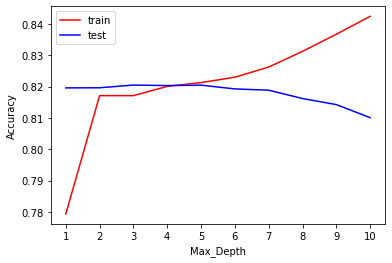

In [10]:
scoreTest = []
scoreTrain = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=0, max_depth=i+1, criterion="entropy")
    clf = clf.fit(x_train,y_train)
    onceTrain = clf.score(x_train,y_train)
    onceTest = cross_val_score(clf,x,y,cv=10).mean()
    scoreTest.append(onceTest)
    scoreTrain.append(onceTrain)

plt.figure()
plt.plot(range(1,11),scoreTrain,color="red",label="train")
plt.plot(range(1,11),scoreTest,color="blue",label="test")
plt.xticks(range(1,11))
plt.xlabel('Max_Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### As shown in the figure, the accuracy reaches its highest value when max_depth is 3, which corresponds to the answer of GridsearchCV

### For CART algorithm

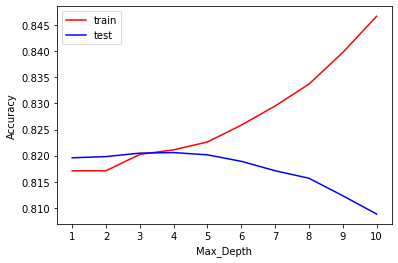

In [11]:
scoreTest = []
scoreTrain = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=0, max_depth=i+1, criterion="gini")
    clf = clf.fit(x_train,y_train)
    onceTrain = clf.score(x_train,y_train)
    onceTest = cross_val_score(clf,x,y,cv=10).mean()
    scoreTest.append(onceTest)
    scoreTrain.append(onceTrain)
plt.figure()
plt.plot(range(1,11),scoreTrain,color="red",label="train")
plt.plot(range(1,11),scoreTest,color="blue",label="test")
plt.xticks(range(1,11))
plt.xlabel('Max_Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### As you can see here, the accuracy reaches its highest value when max_depth is 3. However, this accuracy is still smaller than those of ID3 algorithm. As a result, it is believed that the GridsearchCV indeed helps us to find the best model

### Next, let us plot the performance of different models to directly show the comparison

### It is noted that after selecting the best hype parameters by using GridsearchCV, the accuracy is improved slightly

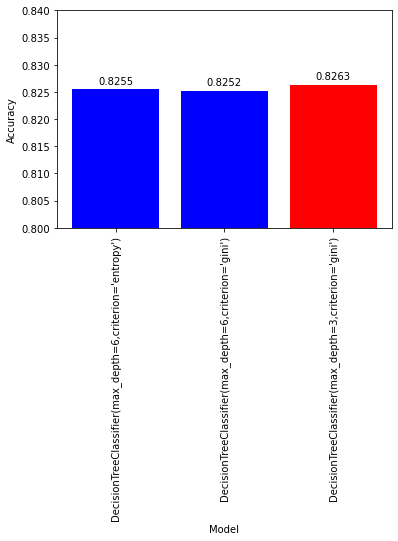

In [12]:
import matplotlib.pyplot as plt
import numpy as np
models = np.array(['DecisionTreeClassifier(max_depth=6,criterion=\'entropy\')',
                   'DecisionTreeClassifier(max_depth=6,criterion=\'gini\')',
                   'DecisionTreeClassifier(max_depth=3,criterion=\'gini\')'])
accuracy = np.array([0.8255,0.8252,0.8263])
colors = ['b', 'b', 'r']
plt.bar(models, accuracy, color=colors)
plt.xticks(np.arange(len(models)), models,rotation=90)
plt.ylim(0.8, 0.84)
plt.xlabel('Model')
plt.ylabel('Accuracy')
for i, v in enumerate(accuracy):
    plt.text(i, v+0.001, str(v), ha='center', fontsize=10)
plt.show()

### Now let us save the best model for performance comparisons and ensemble model

In [13]:
import pickle
filename = 'DecisionTree.sav'
pickle.dump(best_model, open(filename, 'wb'))

You can use the code below to load the model again

In [14]:
loaded_model = pickle.load(open(filename, 'rb'))